# Pymoo + Compute

* https://pymoo.org/
* https://github.com/anyoptimization/pymoo
* https://www.youtube.com/watch?v=six6afYc7RI

In [125]:
import sys

In [126]:
!pip install -U pymoo

[Tutorial](https://www.youtube.com/watch?v=six6afYc7RI)

In [127]:
! pip install deap

In [366]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

try:
    import numpy as np
except:
    exit()

from deap import benchmarks

In [367]:
X = np.arange(-5,5,0.1)
Y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(X,Y)
Z1 = np.zeros(X.shape)
Z2 = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z1[i,j], Z2[i,j] = benchmarks.kursawe((X[i,j],Y[i,j]))

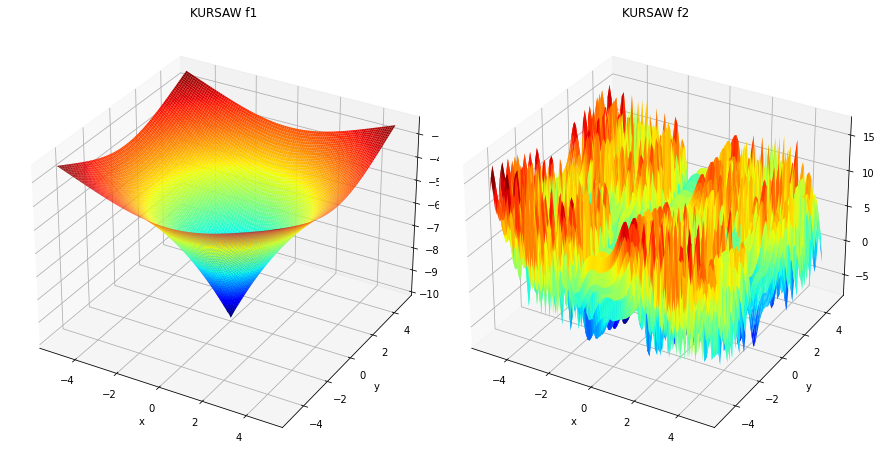

In [368]:
fig = plt.figure(figsize=(12,25))

ax=fig.add_subplot(1,2,1, projection ='3d')
ax.plot_surface(X,Y,Z1, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('KURSAW f1')

ax = fig.add_subplot(1,2,2,projection = '3d')
ax.plot_surface(X,Y,Z2, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('KURSAW f2')

plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
plt.show()

In [369]:
benchmarks.kursawe([0,0])

(-10.0, 0.0)

In [370]:
import pymoo

In [371]:
from pymoo.optimize import minimize

- Problem
- Algorithm
- Stop criteria

In [372]:
# from pymoo.problems import Problem

In [373]:
# https://pymoo.org/problems/definition.html
from pymoo.core.problem import Problem

In [374]:
import numpy as np

class ProblemWrapper(Problem):
    
    def _evaluate(self, designs, out, *args, **kwargs):
        res=[]
        for design in designs:
            # this had to be somewhat changed
            fitness = benchmarks.kursawe(design)
            res.append(fitness)

            out['F'] = np.array(res)

In [375]:
problem = ProblemWrapper(n_var=2, n_obj=2, xl=[-5.,5.], xu=[5.,5.] )

In [376]:
# from pymoo.algorithms.nsga2 import NSGA2
# https://pymoo.org/algorithms/initialization.html
from pymoo.algorithms.moo.nsga2 import NSGA2

algorithm = NSGA2(pop_size = 300)

In [377]:
#This has also changed
from pymoo.factory import get_termination

#stop_criteria = ('n_gen', 100)
stop_criteria = get_termination('n_gen', 100)

In [ ]:
results = minimize(
    problem = problem,
    algorithm=algorithm,
    termination=stop_criteria,
    # This has changed
    seed=1,
    save_history=True,
    verbose=True # what is this??
)

In [ ]:
results.F

In [142]:
results.X

array([[-1.05124387e+00,  5.96326253e+00],
       [-3.55966333e-05,  5.00000000e+00],
       [ 1.70788791e+00,  5.45087394e+00],
       [-1.22075821e+00,  5.07962608e+00],
       [-1.15263720e+00,  5.00000000e+00],
       [-4.81509183e-01,  5.00000000e+00],
       [-8.50962631e-01,  5.00000000e+00],
       [-7.90019822e-01,  5.00000000e+00],
       [-9.44434462e-01,  5.00000000e+00],
       [-6.63558387e-01,  5.00000000e+00],
       [-8.46392214e-01,  5.00000000e+00],
       [-9.47124153e-01,  5.00000000e+00],
       [-1.04043568e+00,  5.00000000e+00],
       [-9.40762926e-01,  5.00000000e+00],
       [-7.85851451e-01,  5.00000000e+00],
       [-7.59221727e-01,  5.00000000e+00],
       [-9.80057735e-01,  5.00000000e+00],
       [-7.14424652e-01,  5.00000000e+00],
       [-5.59441012e-01,  5.00000000e+00],
       [-9.91094852e-01,  5.00000000e+00],
       [-9.20457788e-01,  5.00000000e+00],
       [-8.07616900e-01,  5.00000000e+00],
       [-1.02476653e+00,  5.00000000e+00],
       [-7.

In [143]:
i=0
fx = results.X[i]
ff = results.F[i]
print(str(fx)+" & "+str(ff))

ff =benchmarks.kursawe(fx)
print(str(fx)+" & "+str(ff))

[-1.05124387  5.96326253] & [-2.97886496 -4.37428791]
[-1.05124387  5.96326253] & (-2.978864957839166, -4.374287907835316)


In [144]:
res_data = results.F.T
res_data

array([[-2.97886496e+00, -3.67879441e+00, -3.19041408e+00,
        -3.51744149e+00, -3.58356310e+00, -3.66181444e+00,
        -3.62627419e+00, -3.63343840e+00, -3.61431484e+00,
        -3.64668062e+00, -3.62682893e+00, -3.61395349e+00,
        -3.60083005e+00, -3.61480654e+00, -3.63390996e+00,
        -3.63686642e+00, -3.60945173e+00, -3.64161993e+00,
        -3.65591015e+00, -3.60791117e+00, -3.61749365e+00,
        -3.63142155e+00, -3.60311306e+00, -3.63802315e+00,
        -3.62308423e+00, -3.62069977e+00, -3.61715947e+00,
        -3.64835523e+00, -3.59591209e+00, -3.60251724e+00,
        -3.61151893e+00, -3.62994346e+00, -3.65537498e+00,
        -3.62349176e+00, -3.63104496e+00, -3.63657746e+00,
        -3.62418799e+00, -3.63310363e+00, -3.63914684e+00,
        -3.60996267e+00, -3.61208297e+00, -3.64078448e+00,
        -3.63845289e+00, -3.64425884e+00, -3.62826990e+00,
        -3.61779686e+00, -3.64715216e+00, -3.61174866e+00,
        -3.64234281e+00, -3.64528215e+00, -3.60702677e+0

In [145]:
# !pip install plotly

In [146]:
import plotly.graph_objects as go

In [147]:
# !pip install --upgrade nbformat

In [148]:
fig = go.Figure(
    data=
    go.Scatter(
        x=res_data[0],
        y=res_data[1],
        mode='markers'
    )
)
fig.show()

# Rhino Compute

In [149]:
import compute_rhino3d.Util
import compute_rhino3d.Grasshopper as gh
import rhino3dm
import json

# optional (incase you want to define object class or smth)
import rhinoinside
rhinoinside.load()
import System
import Rhino

In [203]:
# For exporting STL
# mesh io
import meshio
# numpy STL
import numpy as np
from stl import mesh
# matplotlib for displaying
from mpl_toolkits import mplot3d
from matplotlib import pyplot

In [348]:
# we are using local server for this exmample
compute_rhino3d.Util.url = 'http://localhost:8081/'
post_url = compute_rhino3d.Util.url + 'grasshopper'

In [349]:
ghx_dir = 'ghx\\'
rh_dir = '3dm\\'
stl_dir = 'STL\\'
pymoo_dir = 'pymoo\\'

In [350]:
# name of the files to be used
ghfile = pymoo_dir + 'truss_optimization.ghx'

In [351]:
# combine trees
trees = []

In [352]:
# decode data
output = gh.EvaluateDefinition(ghfile, trees)
values = output['values']

In [353]:
tags = []
for i in range(len(values)):
    tname = values[i]['ParamName']
    tags.append(tname)
    print (tname)
# print(tags)

RH_OUT:analysis_structure
RH_OUT:analysis_mass
RH_OUT:go_q_inputs
RH_OUT:go_q_outputs
RH_OUT:go_q_errors
RH_OUT:geo_truss
RH_OUT:geo_mesh
RH_OUT:mesh
RH_OUT:mesh_vertex
RH_OUT:mesh_face
RH_OUT:mesh_vertex_list
RH_OUT:mesh_face_list
RH_OUT:mesh_face_type


In [354]:
# getting tags, name search
def ns(name):
    for i in range(len(values)):
        vname = values[i]['ParamName']
        if (vname == 'RH_OUT:' + name):
            return i

In [355]:
# search for Data Tree
tag = 'go_q_inputs'
ou_ind = ns(tag)
ou_data = values[ou_ind]['InnerTree']
# retrieve data from given Data Tree
ou_value = list(ou_data.values())
ou_object = []
# deserialize
for i in range(len(ou_value[0])):
    ou_unpack = ou_value[0][i]['data']
    ds = ou_unpack
    ds_js = json.loads(ds)
    ou_object.append(ds_js)
    print(ds_js)

RH_IN:bool_method
RH_IN:mesh
RH_IN:mesh_tri
RH_IN:pr_csection
RH_IN:pr_truss


In [356]:
# search for Data Tree
tag = 'analysis_mass'
ou_ind = ns(tag)
print(ou_ind)
ou_data = values[ou_ind]['InnerTree']
print(ou_data)

1
{'{0}': [{'type': 'System.Double', 'data': '17085.597058303054'}]}


In [357]:
# search for Data Tree
tag = 'analysis_structure'
ou_ind = ns(tag)
print(ou_ind)
ou_data = values[ou_ind]['InnerTree']
print(ou_data)

0
{'{0}': [{'type': 'System.Double', 'data': '5.6739728865474337'}]}


In [358]:
import random

In [359]:
def truss_opt(pr_truss, pr_csection, bool_method, directory):
    ############################################################
    pr_truss_tr = gh.DataTree('RH_IN:pr_truss')
    for i in range(len(pr_truss)):
        pr_truss_tr.Append([i], [pr_truss[i]])

    pr_csection_tr = gh.DataTree('RH_IN:pr_csection')
    k = float(pr_csection)
    pr_csection_tr.Append([0],[k])

    mesh_tri_tr = gh.DataTree('RH_IN:mesh_tri')
    k = "True"
    mesh_tri_tr.Append([0], [k])

    # method value ranges from 0 to 3
    # 0 fattner 1 Multipipe 2 Dendro 3 Cocoon
    bool_method_tr = gh.DataTree('RH_IN:bool_method')
    k = int(bool_method)
    bool_method_tr.Append([0],[k])

    # merge data tree
    trees = [pr_truss_tr, pr_csection_tr, mesh_tri_tr, bool_method_tr]
    ############################################################

    # decode data
    output = gh.EvaluateDefinition(ghfile, trees)
    values = output['values']
    ############################################################

    # getting tags, name search
    def ns(name):
        for i in range(len(values)):
            vname = values[i]['ParamName']
            if (vname == 'RH_OUT:' + name):
                return i

    ############################################################
    # search for Data Tree
    tag = 'analysis_mass'
    ou_ind = ns(tag)
    ou_data = values[ou_ind]['InnerTree']

    # retrieve data from given Data Tree
    ou_value = list(ou_data.values())
    ou_object = ou_value[0][0]['data']
    ds = ou_object
    ds_js = json.loads(ds)
    analy_mass = ds_js

    ############################################################
    # search for Data Tree
    tag = 'analysis_structure'
    ou_ind = ns(tag)
    ou_data = values[ou_ind]['InnerTree']

    # retrieve data from given Data Tree
    ou_value = list(ou_data.values())
    ou_object = ou_value[0][0]['data']
    ds = ou_object
    ds_js = json.loads(ds)
    analy_structure = ds_js

    ############################################################
    # # search for Data Tree
    # tag = 'geo_mesh'
    # ou_ind = ns(tag)
    # ou_data = values[ou_ind]['InnerTree']

    ############################################################
    # Getting mesh_vlist
    tag = "mesh_vertex_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values())
    # initialized list
    mesh_vlist = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try :
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            #append final data
            mesh_vlist.append( ds_js )
    #########################################################################

    #########################################################################
    # Getting mesh_ftype
    tag = "mesh_face_type"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values())
    # initialized list
    mesh_ftype = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try : 
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            # append final data
            mesh_ftype.append( ds_js )
    #########################################################################

    #########################################################################
    # Getting mesh_flist
    tag = "mesh_face_list"
    ou_ind = ns(tag)
    ou_dict = values[ou_ind]["InnerTree"]
    # because this object has nested tree, we have to run loop
    ou_value = list(ou_dict.values())
    # initialized list
    mesh_flist = []
    # check for everything and throw back lists
    for i in range(len(ou_value)):
        for j in range(len(ou_value[i])):
            # swipe through all data tree (haven't checked for triple quadraple nested trees)
            ds = ou_value[i][j]["data"]
            ds_js = json.loads(ds)
            # check if the string can be converted into list again
            if ( type(ds_js) is str):
                try :
                    ds_js = json.loads(ds_js)
                except:
                    pass
            else:
                pass
            # append final data
            mesh_flist.append( ds_js )
    #########################################################################

    #########################################################################
    #Writing STL using numpy STL
    vertices = np.array(mesh_vlist)
    faces = np.array(mesh_flist)
    # Create the mesh
    ex_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
    for i, f in enumerate(faces):
        for j in range(3):
            ex_mesh.vectors[i][j] = vertices[f[j],:]
    # Write the mesh to file "cube.stl"
    ex_mesh.save(directory)
    #########################################################################

    data_capsule = dict()
    data_capsule['mesh_vlist'] = mesh_vlist
    data_capsule['mesh_ftype'] = mesh_ftype
    data_capsule['mesh_flist'] = mesh_flist
    data_capsule['analy_mass'] = analy_mass
    data_capsule['analy_structure'] = analy_structure
    return data_capsule


In [360]:
pr_truss = []
truss_numb = 8

for i in range(truss_numb*2):
    seed =1
    k = random.random()
    pr_truss.append(k)

print(pr_truss)

[0.7591161827164402, 0.6002088301322496, 0.8411321957058551, 0.3681079994056491, 0.34028523500198804, 0.29121528741113467, 0.8674198235869027, 0.6039825288917112, 0.9543074571721899, 0.8872651047169627, 0.13534597739545295, 0.5511704740692165, 0.1042749980146136, 0.03913779859691058, 0.07319341883234853, 0.866168357366572]


In [361]:
pr_csection = 15.0

In [362]:
bool_method = 0

In [363]:
directory = 'STL/pymoo-cmpt-test.stl'

In [364]:
truss_opt(pr_truss, pr_csection, bool_method, directory)

{'mesh_vlist': [[5.161555, 4.596113, 0],
  [5.161555, 4.596113, 0.725],
  [5.161555, 4.596113, 1.45],
  [5.285592, 5.114237, 1.45],
  [5.285592, 5.114237, 0.878796],
  [5.285592, 5.114237, 0.307591],
  [5.161555, 4.596113, 1.45],
  [5.161555, 4.596113, 2.175],
  [5.161555, 4.596113, 2.9],
  [5.285592, 5.114237, 2.592409],
  [5.285592, 5.114237, 2.021204],
  [5.285592, 5.114237, 1.45],
  [5.285592, 5.114237, 0.307591],
  [5.285592, 5.114237, 0.878796],
  [5.285592, 5.114237, 1.45],
  [4.838445, 5.403887, 1.45],
  [4.838445, 5.403887, 0.725],
  [4.838445, 5.403887, 0],
  [5.285592, 5.114237, 1.45],
  [5.285592, 5.114237, 2.021204],
  [5.285592, 5.114237, 2.592409],
  [4.838445, 5.403887, 2.9],
  [4.838445, 5.403887, 2.175],
  [4.838445, 5.403887, 1.45],
  [4.838445, 5.403887, 0],
  [4.838445, 5.403887, 0.725],
  [4.838445, 5.403887, 1.45],
  [4.714408, 4.885763, 1.45],
  [4.714408, 4.885763, 0.571204],
  [4.714408, 4.885763, -0.307591],
  [4.838445, 5.403887, 1.45],
  [4.838445, 5.403887

C:\Python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



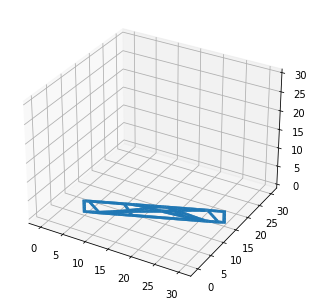

In [365]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(directory)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()